In [7]:
from sklearn.linear_model import ElasticNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def elastic_net_regression(X, y, alpha=0.5,random_state=0):
    elastic_object = ElasticNet(alpha=alpha, random_state=random_state, l1_ratio=0.7)
    mode = elastic_object.fit(X, y)
    predicted = mode.predict(X)
    return mode, predicted

def elasticNet_regression2(X, y, alpha=0.5, power=15, random_state=0):
    data = pd.DataFrame(np.column_stack([X]),columns=['x'])
    predictors = ['x']
    if power > 1:
        for i in range(2, power+1):
            col_name = 'x_%d'%i
            data[col_name] = data['x']**i
            predictors.extend([col_name])
    elif power < 1:
        return None, None
    elastic_object = ElasticNet(alpha=alpha, max_iter = 1000, random_state=random_state, l1_ratio=0.5, normalize=True)
    mode = elastic_object.fit(data[predictors], y)
    predicted = mode.predict(data[predictors])
    return mode, predicted

In [8]:
def get_test_data2():
    X = np.sort(5 * np.random.rand(40, 1), axis=0)
    y = np.sin(X).ravel()
    # Add noise to targets
    y[::5] += 3 * (0.5 - np.random.rand(8))
    return X, y

def get_test_data3():
    X = np.array([i*np.pi/180 for i in range(60,300,4)])
    np.random.seed(10)
    y = np.sin(X) + np.random.normal(0,0.15,len(X))
    return X, y

def plot_data1(X, y, predicted,show=True):
    plt.scatter(X, y, marker='x')
    plt.plot(X, predicted, c='r')
    plt.xlabel('x')
    plt.ylabel('y')
    if show:
        plt.show()

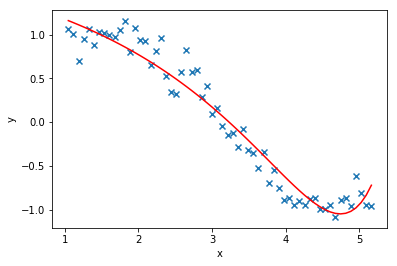

In [9]:
# test_lasso2
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
X, y = get_test_data3()
mode, predicted = elasticNet_regression2(X, y, alpha_ridge[4])
plot_data1(X, y, predicted)

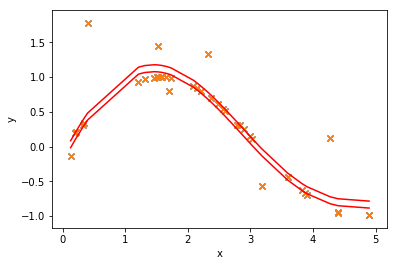

In [10]:
# test_svr1():
from sklearn.svm import SVR
def svr_algorithm(X, y, alg_type=0):
    svr_object = None
    if alg_type == 0:
        svr_object = SVR(kernel='rbf', C=1e3, gamma=0.1)
    elif alg_type == 1:
        svr_object = SVR(kernel='linear', C=1e3)
    elif alg_type == 2:
        svr_object = SVR(kernel='poly', C=1e3, degree=2)
        
    if svr_object is not None:
        mode = svr_object.fit(X, y)
        predicted = mode.predict(X)
        return mode, predicted
    
    return None, None

X,y = get_test_data2()
mode, predicted = svr_algorithm(X, y)
plot_data1(X, y, predicted, False)
plot_data1(X, y, predicted+0.1, True)

In [ ]:
# test_xgboost():
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def get_test_data5():
    X = np.array([i*np.pi/180 for i in np.arange(0, 200, 1)])
    np.random.seed(10)
    y = np.sin(X) + np.random.normal(0,0.15,len(X))
    return X, y

def get_param():
    param = {
        'seed': 0,
        'eta': 0.1,
        'colsample_bytree': 0.5,
        'silent': 1,
        'objective': 'reg:linear',
        'max_depth': 5,
        'min_child_weight': 3,
        'nthread': 4,
        'eval_metric': 'rmse'
    }
    
    return param

def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y), np.exp(yhat))

def xgboost_algorithm(X, y, param=None, num_boost_round=10, maglify=1.0):
    y = np.multiply(y, maglify)
    real_param = param
    if param is None:
        real_param = get_param()
    data = pd.DataFrame(np.column_stack([X]),columns=['x'])
    label = pd.DataFrame(np.column_stack([y]))
    print(data.head())
    print(label.head())
    dtrain = xgb.DMatrix(data, label=label)
    print(3)
    mode = xgb.train(real_param, dtrain=dtrain, num_boost_round=num_boost_round, feval=xg_eval_mae, maximize=False)
    dtest = xgb.DMatrix(data)
    print(2)
    predicted = mode.predict(dtest)
    predicted = np.divide(predicted, maglify)
    return mode, predicted

X, y = get_test_data5()
print(np.shape(X), type(X), np.shape(y), type(y))
mode, predicted = xgboost_algorithm(X, y)
plot_data1(X, y, predicted)
print(np.shape(np.array([1,2,3])))